<a href="https://colab.research.google.com/github/WahlerP/csfundamentals-hsg/blob/master/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Why Data Visualization?

In Data Science it is often useful to be able to visualize any given data. Humans are very visual creatures: we understand things better when we see things visualized. After all, it is often not possible to represent some results, relationships or peculiar data patterns just by looking at a number of tables. <br> <br> Let's take for example the often used "iris" data set, which shows three different flowers (virginica, setosa and versicolor) as well as the length & widths of their petal (Blütenblatt). If we would create a default dataframe (remember the lesson on pandas) of the dataset, we would get the following.

In [1]:
# Download the iris dataset and load it into a DataFrame

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df.drop(labels=["petal length (cm)", "petal width (cm)"], axis=1)

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0.0
1,4.9,3.0,0.0
2,4.7,3.2,0.0
3,4.6,3.1,0.0
4,5.0,3.6,0.0
...,...,...,...
145,6.7,3.0,2.0
146,6.3,2.5,2.0
147,6.5,3.0,2.0
148,6.2,3.4,2.0


As we can see, the mere table of different sepal lengths and widths does not really tell us much. Quite contrary, it might even lead to confusion.

If we, however, plot the same dataset and add some nice colour coding, the relationship between a flower species and its sepal dimensions become much more apparent!

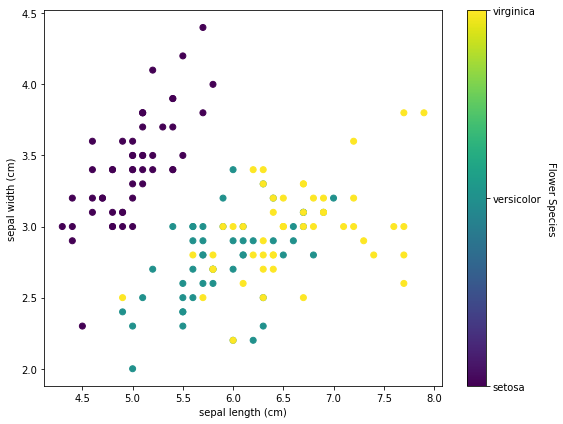

In [2]:
# no need to understand the following code - just run it and compare the table with the plot
import matplotlib.pyplot as plt
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(8, 6))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
cb = plt.colorbar(ticks=[0, 1, 2], format=formatter)
cb.ax.set_ylabel('Flower Species', rotation=270, labelpad = 15)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

As we can see, the plot gives us much more detailed and concise understanding of the given data. We can, for example, see that setosa flowers tend to have wide and short sepals whereas the sepals of virginica flowers seem to be taller.

# Matplotlib

Matplotlib is the go-to library for visualizing stuff in Python. Let's have a look at the basics.

***Keep in Mind:*** <br>
At first sight, it will seem that there are quite some components to consider when you start plotting with this Python data visualization library. Admittedly, it can be confusing and sometimes even discouraging seeing the amount of code that is necessary for some plots, not knowing where to start yourself and which components you should use. However, the course does only expect you to know the basics - so don't worry if some complex visualization might not work out the first few tries.

## General Matplotlib Tips

Before we dive into the details of creating visualizations with Matplotlib, there are a few useful things you should know about using the package.

### Importing Matplotlib

Just as we use the ``np`` shorthand for NumPy and the ``pd`` shorthand for Pandas, we will use some standard shorthands for Matplotlib imports:

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

The ``plt`` interface is what we will use most often, as we shall see throughout this chapter.

### Setting Styles

We will use the ``plt.style`` directive to choose appropriate aesthetic styles for our figures.
Here we will set the ``classic`` style, which ensures that the plots we create use the classic Matplotlib style:

In [0]:
plt.style.use('classic')

### ``show()`` or No ``show()``? How to Display Your Plots

A visualization you can't see won't be of much use, but just how you view your Matplotlib plots depends on the context.
The best use of Matplotlib differs depending on how you are using it; roughly, the three applicable contexts are using Matplotlib in a script, in an IPython terminal, or in an IPython notebook.

#### Plotting from a script

If you are using Matplotlib from within a script, the function ``plt.show()`` is your friend.
``plt.show()`` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures.

So, for example, you may have a file called *myplot.py* containing the following:

```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed:

```
$ python myplot.py
```

The ``plt.show()`` command does a lot under the hood, as it must interact with your system's interactive graphical backend.
The details of this operation can vary greatly from system to system and even installation to installation, but matplotlib does its best to hide all these details from you.

One thing to be aware of: the ``plt.show()`` command should be used *only once* per Python session, and is most often seen at the very end of the script.
Multiple ``show()`` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided.

#### Plotting from an IPython notebook

You are currently reading this crashcourse in an IPython notebook. The notebook is a browser-based interactive data analysis tool that can combine narrative, code, graphics, HTML elements, and much more into a single executable document. Because of its flexibility and easy of use, we mainly use notebooks when doing Data Science! 

Plotting interactively within an IPython notebook can be done with the ``%matplotlib`` command. Here, you have the option of embedding graphics directly in the notebook, with two possible options:

- ``%matplotlib notebook`` will lead to *interactive* plots embedded within the notebook
- ``%matplotlib inline`` will lead to *static* images of your plot embedded in the notebook

For this chapter, we will generally opt for ``%matplotlib inline``:

In [0]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic - no need for the `plt.show()` command:

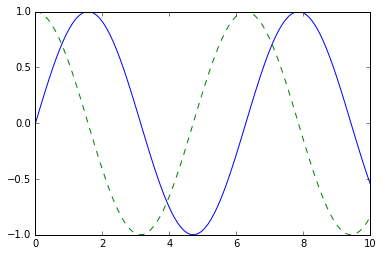

In [6]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

## Let's start plotting

### Basic Plot

A very basic plot can be created using the `.plot()` operator. This creates a simple graph with an x and an y-axis.


[]

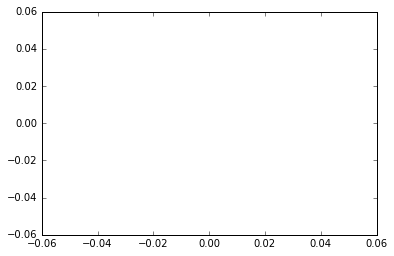

In [7]:
# Create plot with x and y-axis
plt.plot()

Looks okay, but not really useful so far. Let's try adding some data to our empty plot. On a still, very basic level, we could try to plot a character "o".

*Note:* For this to work we must specify some arbitrary x- and y-values first. The "o" character will therefore be the third argument of the plot.The first two values (5,5) are the maximum x and y values that we want to visualize, the third argument ("o") is called a format string character (=fmt) which is used for testing out the basic properties of a graph (not practical in real life).

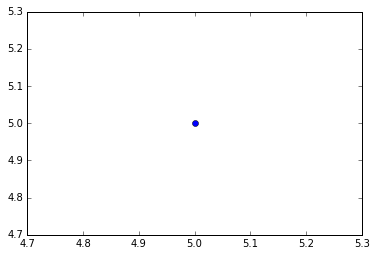

In [8]:
plt.plot(5,5,"o")

Awesome! At this point you may wonder how you are supposed to know which potential parameters you can enter into a basic plot. This is where documentation comes in. Simply type in `plt.plot?` and you will get a list of all possible operations of the respective method.

In [0]:
plt.plot?

As you can see, there are countless possible options to choose from. This is actually one of the main issues with matplotlib. Due to its huge flexibility, countless options of working with the library exist - this, unfortunately, may become confusing. <br><br> However, **noone expects you to know this stuff by heart**. For working with matplotlib, Googling and looking at the documentation is key - even the pros do it all the time.

### Bacic Plot - Figures and Axes

While the `.plot()` option (as shown in the lecture), is a very straight forward approach to creating a simple graph - we often use `figures` and `axes` instead.
In their simplest form, a figure and axes can be created as follows:

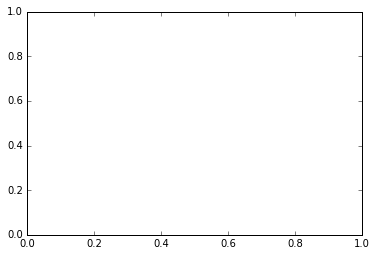

In [10]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's plot the same graph again.

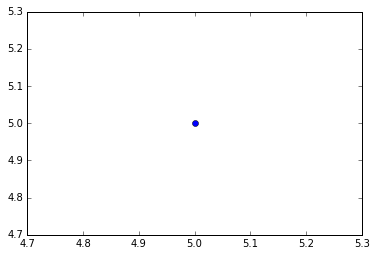

In [11]:
fig = plt.figure()
ax = plt.axes()
ax.plot(5,5, "o")

Summing up, we can either use the combination of `plt.figure `and `plt.axes` to plot a graph or use `plt.plot` and let the figure and axes be created for us in the background
(see [Two Interfaces for the Price of One](04.00-Introduction-To-Matplotlib.ipynb#Two-Interfaces-for-the-Price-of-One) for a discussion of these two alternatives).

### Basic Plot - Get Current Axes

A third alternative to creating plots is by using the `.gca` (= get current axes) parameter. As stated by its name, this method gets the current Axes instance of the current figure and allows us to store them in a variable. <br><br> This makes our code much cleaner and allows us to apply further operations on our plot. One common addition to the .gca operator, is the use of the .axis() operator, which allows us to change the properties of the axes we just "got". .axis() allows us to specify the minimum and maximum x & y values of our respective graph. Let's look at an example:

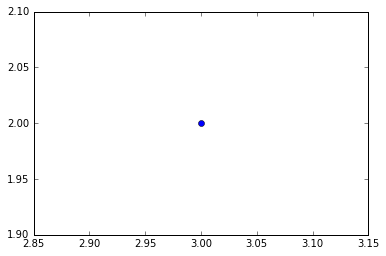

In [12]:
plt.figure()
# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')
# get the current axes (we store our plot in the variable "ax")
ax = plt.gca()
# Show our plot
ax

So far so good. Let's now use .axis() to change the shown axis to our liking.

(0.0, 6.0, 0.0, 10.0)

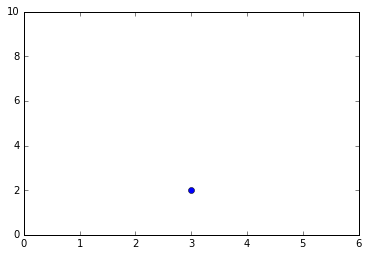

In [13]:
# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')
# get the current axes (we store our plot in the variable "ax")
ax = plt.gca()
# Set axis properties [xmin, xmax, ymin, ymax] of our plot (which is stored in "ax")
ax.axis([0,6,0,10])

**Exercise For You** <br>
Look at the following code snippet and try to guess how the resulting plot may look. Then, copy the code, paste it in the empty cell below and check whether you were correct.



```
# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')
```



In [0]:
# test your answer

## Short look at line graphs

In the lecture the following line graph is introduced.

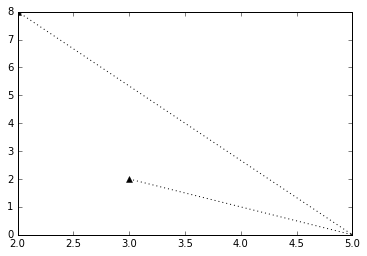

In [15]:
plt.plot([3, 5, 2], [2, 0, 8], "^k:")

Let's explore what the individual components actually do:


*   plt.plot() generates the basic graph as we have seen before.
*   `[3,5,2]` represent the x-parameters whereas `[2,0,8]` represents the y-parameters of our graph. This leads to the following three x:y coordinates `3:2`, `5:0`, and `2:8`. The graph then draws a line between the points in the order they have been specified.
*  `"^k:"` is again a format string (fmt), which consists of the following parts: `fmt = '[marker][line][color]'`. In our case the `"^"` stands for a triangle marker, the `"k"` specifies that the markers and their connecting lines are black and the `":"` transform the line into a dotted line.

As we can see, documentation is key for understanding how plots work!





**Exercise For You** <br>
Again try to guess which plot the following code returns. Use the empty cell below to verify your result.



```
plt.plot([2,3,4,5],[5,4,3,2], "Dg-.")
```

*Hint:* Use the documentation (plt.plot?) to find the meaning of the format string "Dg-.".



In [0]:
#run to access documentation
plt.plot?

In [0]:
# test your answer

## Scatter Plots

Another commonly used plot type is the simple scatter plot, a close cousin of the line plot.
Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape. The plot used in our iris dataset example above was a scatter plot.

### Scatter Plots using `plt.plot()`

Technically we can use the standart .plot() operator in connection with the "o" format string (does not draw a line between points) to define a scatter plot. This would look as follows:

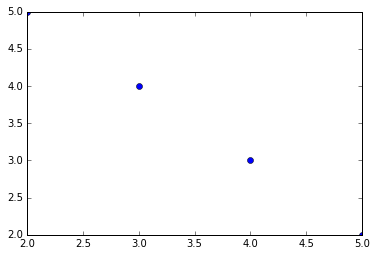

In [18]:
plt.plot([2,3,4,5],[5,4,3,2], "o")

### Scatter Plots using `plt.scatter()`

A second, more powerful method of creating scatter plots is the ``plt.scatter`` function, which can be used very similarly to the ``plt.plot`` function:


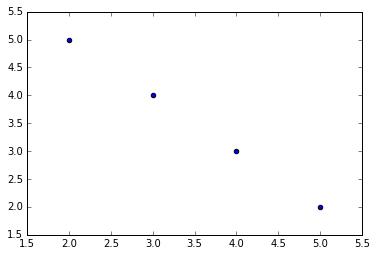

In [19]:
plt.scatter([2,3,4,5],[5,4,3,2])

The primary difference of ``plt.scatter`` from ``plt.plot`` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

Let's show this by creating a random scatter plot with points of many colors and sizes.

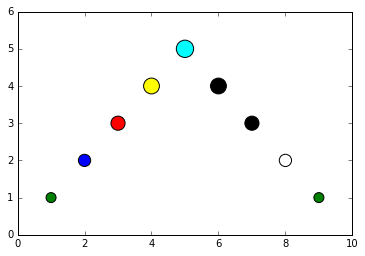

In [20]:
x = [1,2,3,4,5,6,7,8,9]
y= [1,2,3,4,5,4,3,2,1]

colors = ["green", "blue", "red", "yellow", "cyan", "black", "black", "white", "green"]
size = [100,150,200,250,300,250,200,150,100]

# creates a plot with points at x:y coordinates that have size s and colors c
plt.scatter(x, y, s=size, c=colors)

**Exercise For You**<br>
Try to guess the output of the following code snippet.



```
x = [1,2,3,4,5,6,7,8]
y = x

colors = ['green']*(len(x)-1)
colors.append('blue')

plt.scatter(x, y, s=100, c=colors)
```



In [0]:
#Test your answer here

**Exercise For You**<br>
Try to guess the output of the following code snippet.

```
x = [1,2,3,4,5,6,7,8]
y = x
colors = ["orange" if x % 2 == 0 else "black" for x in range(len(x))]

plt.scatter(x, y, s=100, c=colors)
```



In [0]:
# Test your answer here

## Adding labels

To make your graph more meaningful, it is often necessary to add labels that describe what the hack is shown.<br><br> Adding labels is rather easy. For labels displayed at the x-axis just use `plt.xlabel`, for labels displayed at the y-axis use `plt.ylabels`. We can also give our plot a title using `plt.title`.

Text(0.5, 1.0, 'Relationship between excercise and grades')

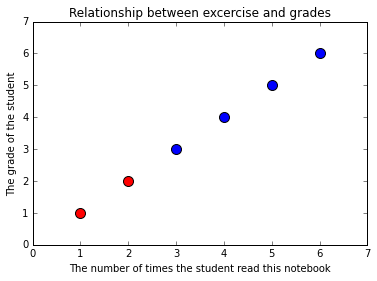

In [23]:
#prepare some dummy data
x = [1,2,3,4,5,6]
y = x
plt.scatter(x[:2], y[:2], s=100, c='red')
plt.scatter(x[2:], y[2:], s=100, c='blue')


# add a label to the x axis
plt.xlabel('The number of times the student read this notebook')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between excercise and grades')

You can furthermore use the argument labelpad (for ylabel/xlabel) or pad (for title) to determine the distance between the label and our graph.

Text(0.5, 1.0, 'Relationship between excercise and grades')

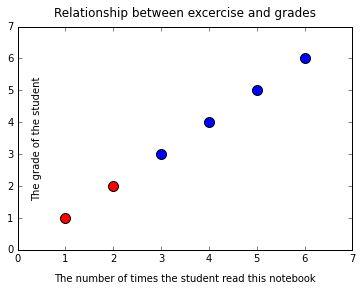

In [24]:
#prepare some dummy data
x = [1,2,3,4,5,6]
y = x
plt.scatter(x[:2], y[:2], s=100, c='red')
plt.scatter(x[2:], y[2:], s=100, c='blue')


# add labelpad 
plt.xlabel('The number of times the student read this notebook', labelpad=10 )
# we can also enter negative values for labelpad
plt.ylabel('The grade of the student', labelpad=-35)
# add a title
plt.title('Relationship between excercise and grades', pad=10)

## Adding a legend

While our graph looks better now, the difference between red and blue points seem to be unclear. Additional information like this can be displayed using a legend. We can add the legend elements using the "`label`" parameter within the scatter plot. After this we also have to call the legend using `plt.legend()`

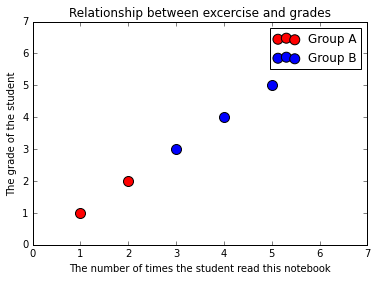

In [25]:
x = [1,2,3,4,5,6]
y = x
plt.scatter(x[:2], y[:2], s=100, c='red', label= "Group A")
plt.scatter(x[2:], y[2:], s=100, c='blue',label = "Group B" )


# add a label to the x axis
plt.xlabel('The number of times the student read this notebook')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between excercise and grades')
plt.legend()

Better, but not quite there yet. Let's customize our legend as follows:

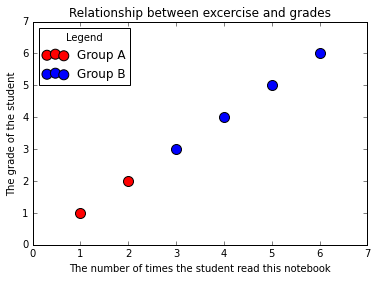

In [26]:
x = [1,2,3,4,5,6]
y = x
plt.scatter(x[:2], y[:2], s=100, c='red', label= "Group A")
plt.scatter(x[2:], y[2:], s=100, c='blue',label = "Group B" )


# add a label to the x axis
plt.xlabel('The number of times the student read this notebook')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between excercise and grades')
plt.legend(loc="upper left", frameon=True, title='Legend')

In [0]:
#feel free to check the documentation to see which further parameters for our legend exist
plt.legend?

## Line Plot with multiple lines

There are various ways to plot multiple sets of data. The plt.plot() documentation gives us the following three possibilities:

- The most straight forward way is just to call `plot` multiple times.  
  Example:  

      plot(x1, y1, 'bo')  
      plot(x2, y2, 'go')  

- Alternatively, if your data is already a 2d array, you can pass it  
  directly to *x*, *y*. A separate data set will be drawn for every  
  column.  

  Example: an array `a` where the first column represents the *x*  
  values and the other columns are the *y* columns::  

      plot(a[0], a[1:])  

- The third way is to specify multiple sets of *[x]*, *y*, *[fmt]*  
  groups::  

      plot(x1, y1, 'g^', x2, y2, 'g-')  

Let's look at an example of how the third way would look like:

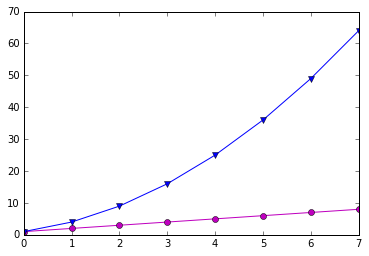

In [28]:
linear_data = [1,2,3,4,5,6,7,8]
exponential_data = [ x**2 for x in linear_data ]
# plot the linear data and the exponential data
plt.plot(linear_data, 'm-o', exponential_data, '-v',)
plt.show()

### Filling Area between lines

Using the operator `plt.fill_between` we can fill the area between two horizontal curves.

The curves are defined by the points (*x*, *y1*) and (*x*, *y2*). This
creates one or multiple polygons describing the filled area. Common parameters used with this operation are:


*   x = The first argument needs to
be an iterable of the
x-coordinates
* y1 = The y coordinates of the nodes defining the first curve.
* y2 = The y coordinates of the nodes defining the second curve.
* where = Define *where* to exclude some horizontal regions from being
    filled.
* facecolor = colour of filled area



In [0]:
# for more info check out:
plt.fill_between?

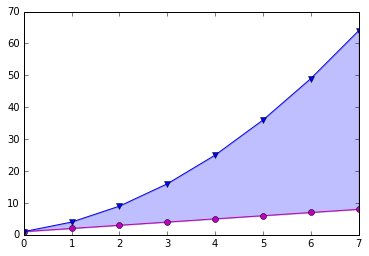

In [30]:
# let's fill the area between our two curves from above
linear_data = [1,2,3,4,5,6,7,8]
exponential_data = [ x**2 for x in linear_data ]
# plot the linear data and the exponential data
plt.plot(linear_data, 'm-o', exponential_data, '-v')


plt.fill_between(x = range(len(linear_data)),
                 y1=linear_data, 
                 y2=exponential_data,
                 facecolor='blue',
                 alpha=0.25)

**Exercise For You**<br>
Try to guess the output of the following code snippet.



```
linear_data = [1,2,3,4,5,6,7,8]
exponential_data = [ x**2 for x in linear_data ]
plt.plot(linear_data, 'm-o', exponential_data, '-v')

plt.fill_between(range(len(linear_data)), [4, 14, 4, 14, 4, 14, 4, 14], 
[40, 30, 40, 30, 40, 30, 40, 30],
facecolor='blue', alpha=0.25)
```



### Line Plots with Dates

Setting the used datatype to `datetime64[D]` returns dates. We can then extract the exact time points between two dates using np.arrange(). This looks as follows:


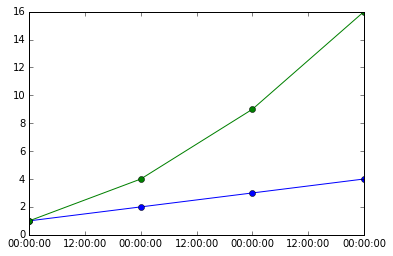

In [31]:
linear_data = [1,2,3,4]
exponential_data = [ x**2 for x in linear_data ]
observation_dates = np.arange('2020-04-27',
                              '2020-05-01',
                              dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')


### Label Rotation

As we can see the labels on the x-axis (so called ticks) are now rather cramped.Let's see how we can manually change this by slightly rotating the x-axis ticks.<br><br>
In a first step we must get the current axes of our plot using `.gca()`. From these axes we are only interested in the ticks on the x-axis. Therefore, we save the x-axis via `.xaxis()`. From this axis we then get each individual tick label and rotate it by 45 degrees.

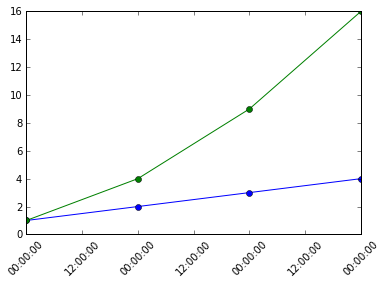

In [32]:
plt.plot(observation_dates, linear_data, '-o', observation_dates, exponential_data, '-o')
x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
  item.set_rotation(45)

## Bar Charts

Next to line and scatter plots, bar charts are a great way of visualizing information. A bar chart is created using `plt.bar()`. The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The vertical baseline
is *bottom* (default 0).

<BarContainer object of 4 artists>

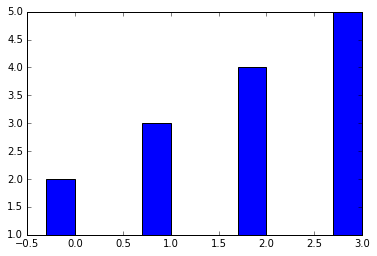

In [33]:
data = [1,2,3,4]
xvalues = range(len(data))
plt.bar(x= xvalues, 
        height= data, 
        width = -0.3, 
        bottom= 1, 
        align="edge")

In [0]:
# once again, the documentation lists several possible parameter combinations
plt.bar?

### Bar Chart with multiple bars

Obviously we can also plot several different bars within one bar chart. This is a great tool for visualizing some sort of comparison. <br><br>
To make this work, we simply plot two sets of bar charts but add the width of the first bar chart to the x-value of the second bar chart. This way both bar charts are directly next to each other.

<BarContainer object of 4 artists>

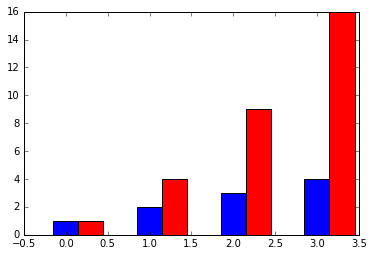

In [35]:
linear_data = [1,2,3,4]
exponential_data = [ x**2 for x in linear_data ]

xvals = range(len(linear_data))

plt.bar(xvals, linear_data, width = 0.3)

# plot another set of bars, adjusting the new xvals to make up for thefirst set of bars plotted
new_xvals = []
for item in xvals:
  new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

### Error Bar Charts

For any scientific measurement, accurate accounting for errors is nearly as important, if not more important, than accurate reporting of the number itself.
For example, imagine that some study results in the following bar charts.

<BarContainer object of 4 artists>

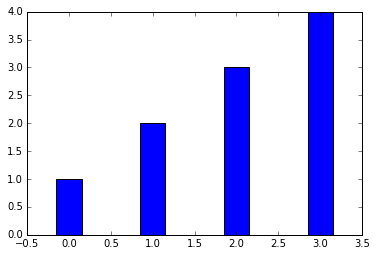

In [36]:

linear_data = [1,2,3,4]
xvals = range(len(linear_data))



# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3)

Now however, it could be the cas that there might be potential deviation between the results of our study and the findings of another study. This difference can then be plotted using the `yerr` parameter.

<BarContainer object of 4 artists>

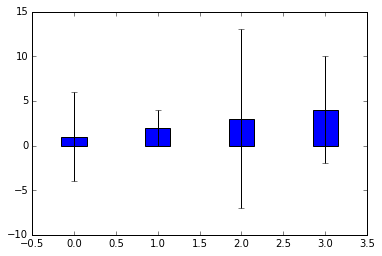

In [37]:
linear_data = [1,2,3,4]
xvals = range(len(linear_data))

# specify by which amount the data points may deviate
linear_err = [5,2,10,6]

# Plot a new set of bars with errorbars using the list of error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

### Stacked Bar Charts

In other cases, it might be useful to not visualize different bar types next to each other but stack them up. This can be done by plotting two `plt.bar()` and using the `bottom` parameter within the second bar chart to specify that the first bar chart shall be used as the "ground".

<BarContainer object of 4 artists>

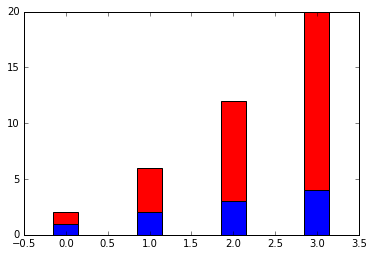

In [38]:
linear_data = [1,2,3,4]
exponential_data = [1,4,9,16]

xvals = range(len(linear_data))

# create normal bar chart with blue bars
plt.bar(xvals, linear_data, width = 0.3, color='b')

#create second bar chart with red bars, the linear data is specified as the new bottom
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

### Horizontal Bar Charts

Of course, it is also possible to change the axis of the individual bar's root. To do so we merely change` plt.bar()` with `plt.barh()`

<BarContainer object of 4 artists>

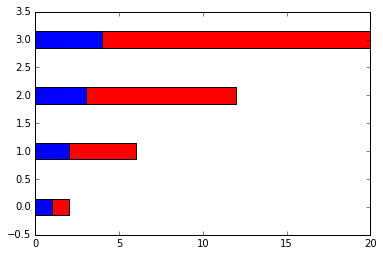

In [39]:
linear_data = [1,2,3,4]
exponential_data = [ x**2 for x in linear_data]
xvals = range(len(linear_data))

#use plt.barh() instead of plt.bar()
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data,color='r')

## Subplots

So far, we have only ever printed one individual chart. Often, however, it is necessary to plot two or more graphs at the same time (for comparisons, etc.). This can be done by defining so called subplots within a plot. Each new subplot is initialized by the `plt.subplot()` operator. This operator takes three basic parameters:


*   nrows: Number of rows we want our subplot to have
*   ncols: number of columns we want our sublot to have
* index: specifies the position of the plot. For 1 as the index the
position is top left, and it increases from left to right



Text(0.5, 1.0, 'Exponential Data')

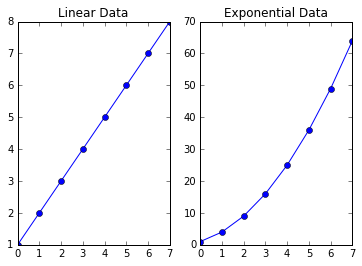

In [40]:
#subplot 1
plt.subplot(1, 2, 1)
linear_data = [1,2,3,4,5,6,7,8]
plt.plot(linear_data, '-o')
plt.title("Linear Data")
exponential_data = [ x**2 for x in linear_data ]

#subplot 2
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')
plt.title("Exponential Data")

If we want to plot both graphs above each other, we just need to add a second row `plt.subplot(2, 2, 1)` and specify the index of the second subplot to be 3

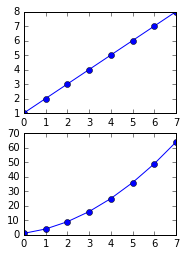

In [41]:
#subplot 1
plt.subplot(2, 2, 1)
linear_data = [1,2,3,4,5,6,7,8]
plt.plot(linear_data, '-o')


#subplot 2
plt.subplot(2, 2, 3)
plt.plot(exponential_data, '-o')


### Subplots with shared axes

In the example, both plots had different axes. The linear data ranges form 0-8 while the exponential data ranges from 0-70. However, visualizing two graphs with different axes next to each other may lead to confusion, which is why we need a way to assign the same axis to both of them.<br><br>
To do so, we simply assign our `plt.subplot()` operators to variables `ax1` & `ax2`. We can then use the axis of the first subplot within the second subplot using the `sharey` parameter.

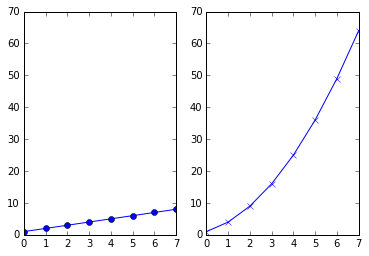

In [42]:
linear_data = [1,2,3,4,5,6,7,8]
exponential_data = [ x**2 for x in linear_data ]

#create first subplot and assign it to ax1
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

### Create 3x3 Plot

Okay, let's see how we can combine our knowledge of subplots to create a 3X3 matrix of individual plots. 

As we don't want to write plt.subplot() for every single of the subplot we can specify a subplot once, and assign the returned axes to variables. In our case we specify that our subplot should have 3 rows and 3 columns and should both share the y- as well as the x-axis.

In [0]:
#in order to understand the next code snippet it might be useful to have a look at the documentation
# We can see that plt.subplot returns the axes of the subplot which are specified as fig, (axes)
plt.subplot?

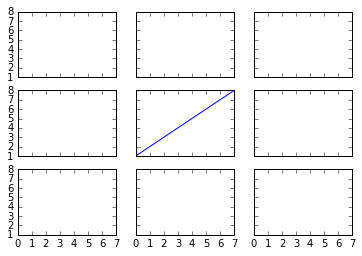

In [44]:
linear_data = [1,2,3,4,5,6,7,8]
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3,3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes
ax5.plot(linear_data, '-')

In [0]:
# Task: Use this code-block to create a 4x4 subplot in which the diagonals are filled with a line

## Histograms

Matplotlib histogram is used to visualize the frequency distribution of a numeric array by splitting it to small equal-sized bins.

The pyplot.hist() in matplotlib lets you draw the histogram. It requires an array as the required input and you can specify the number of bins needed. Here the bins represent the individual "lines" in an histogram that map the distribution of the data.

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram')]

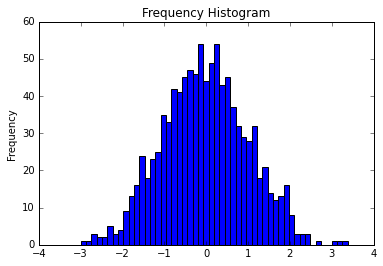

In [46]:
# create some normally distributed input data x of size 1000
x = np.random.normal(size = 1000)

# plot the normal distribution using 50 lines (bins)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency')

Look at the following example and try to understand every single line of code (take your time).

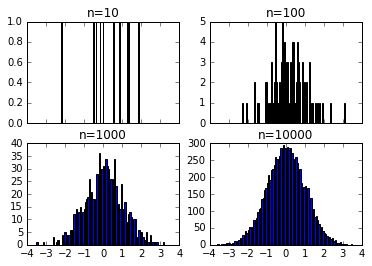

In [47]:
#create 2x2 subplot with shared x-axis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n random samples and plot the histograms
for n in range(0,len(axs)):
  sample_size = 10**(n+1)
  sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
  axs[n].hist(sample, bins=100)
  axs[n].set_title('n={}'.format(sample_size))

## Boxplot

We can also create more advance types of plots - such as the boxplot. As this plot is rather advanced, it is not likely to be a topic in the exam. If you are nonetheless interested in how it works, feel free to scroll through [this tutorial](http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/). 

In [0]:
def annotate_boxplot(bpdict, annotate_params=None, x_offset=0.05, x_loc=0, text_offset_x=35, text_offset_y=20):
  annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})
  plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]),
               **annotate_params)
  plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
  plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
  plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
  plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)

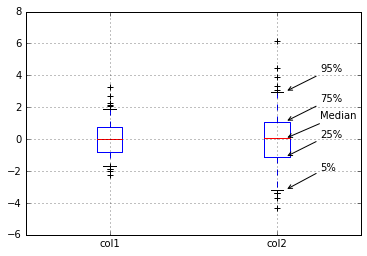

In [49]:
df = pd.DataFrame({'col1': np.random.normal(size=100), 'col2': np.random.normal(scale=2, size=100)})

bpdict = df.boxplot(whis=[5, 95], return_type='dict')
annotate_boxplot(bpdict, x_loc=1)

## Heatmap

A heatmap is another great way to show a distribution of some data. It is created using the plt.hist2d() operator which takes severally differently distributed datapsets as an input and shows their distribution using colour. In general, the warmer an area is, the more datapoints exist at that certain coordinate.

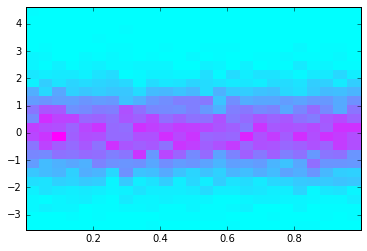

In [68]:
# return 100000 random values beteween 0 and 1 that are normally distributed
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)

# return 100000 random values beteween 0 and 1
X = np.random.random(size=10000)


# use cmap parameter to change colour scheme, possilbe colours schemes can be found online
plt.hist2d(X, Y, bins=25, cmap = "cool")

plt.show()

## Plotting with Pandas

The data we want to visualize often comes in form of a pandas DataFrame. Let's have a look how  DataFrames and our plotting library interact. The interaction is actually rather easy. Say we have any give DataFrame df with some sample data. We can then simply plot this dataframe by typing `df.plot()`

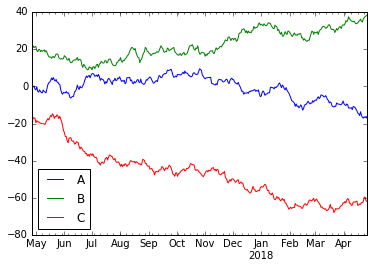

In [70]:
#create a sample dataframe df

np.random.seed(123)
df = pd.DataFrame({'A': np.random.randn(365).cumsum(0),'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, index=pd.date_range('04/27/2017', periods=365))
#plot df
df.plot()

Scatterp Plots with Pandas

Within the `df.plot()` operator we can furthermore use the `kind` parameter to specify which kind of plot we wish to plot. Options include line' : 
* line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin

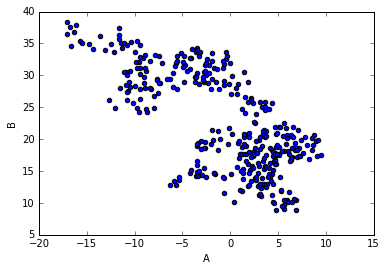

In [77]:
df.plot("A", "B" ,kind= "scatter")

Due to the fact that we have two axes as well as different colours for the datapoints in a scatterplot, this kind of plot is especially useful when visualizing three dimensional data in a linear fashion. Here just think of our iris dataset from the beginning:


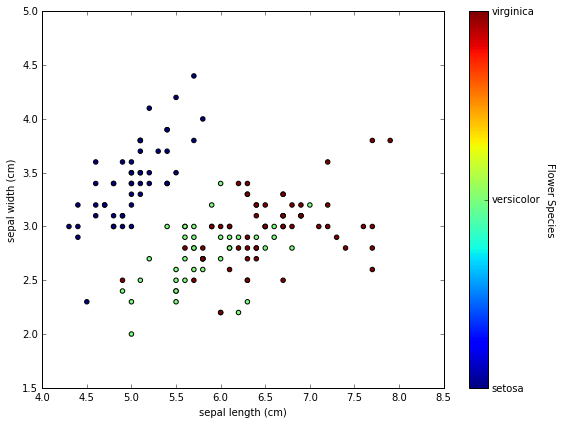

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
cb = plt.colorbar(ticks=[0, 1, 2], format=formatter)
cb.ax.set_ylabel('Flower Species', rotation=270, labelpad = 15)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()

Another way to create a scatter plot from a dataframe would be the use of the `df.plot.scatter()` parameter. The use is quite similar to above.

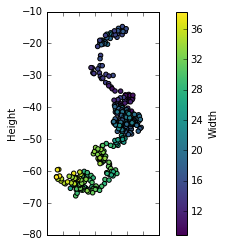

In [86]:
np.random.seed(123)
df = pd.DataFrame({'Length': np.random.randn(365).cumsum(0),
                   'Width': np.random.randn(365).cumsum(0) + 20,
                   'Height': np.random.randn(365).cumsum(0) - 20},
index=pd.date_range('04/27/2020', periods=365))
ax = df.plot.scatter('Length', 'Height', c='Width', cmap='viridis')
ax.set_aspect("equal")

### 3D Scatterplot

In case we have higher dimensional data, it might be useful to plot a 3D graph. As this involves rather advanced python, this is not going to be relevant for the exam. The following example should nonetheless give you an idea of how it works:

Text(0.5, 0, 'Width')

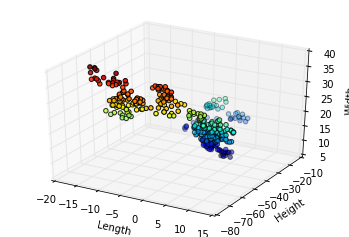

In [88]:
from mpl_toolkits.mplot3d import Axes3D

#create sample dataframe with 3Dimensions
np.random.seed(123)
df = pd.DataFrame({'Length': np.random.randn(365).cumsum(0), 'Width': np.random.randn(365).cumsum(0) + 20,
                   'Height': np.random.randn(365).cumsum(0) - 20},
index=pd.date_range('04/27/2020', periods=365))

#create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Length"].values, df["Height"].values, df["Width"].values, c=df["Width"].values)
ax.set_xlabel('Length');ax.set_ylabel('Height');ax.set_zlabel('Width')

Note: Pandas does not have an operator `df.plot()` for 3D plots

### Bot Plox with Pandas


Using the opeartor `df.plot.box()` one can furthermore create a boxplot out of a dataframe

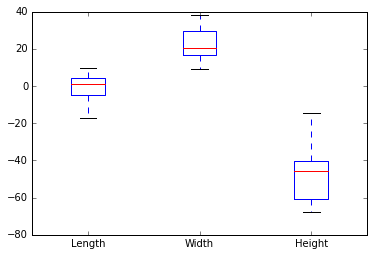

In [90]:
np.random.seed(123)
df = pd.DataFrame({'Length': np.random.randn(365).cumsum(0), 'Width': np.random.randn(365).cumsum(0) + 20, 'Height': np.random.randn(365).cumsum(0) - 20},
index=pd.date_range('04/27/2020', periods=365))

#create box plot
df.plot.box()